# Lab 10 : Model Selction

## Import Commomn Libraries

In [79]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about the chances of the Rain Today as per the given attributes like Temperature,Rainfall,Evaporation,Wind speed,Humidity and Pressure. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| MinTemp        | The Min Temperature of the day                                                        |
| MaxTemp        | The Max Temperature of the day                                                        |
| Rainfall       | The Rainfall Stats of that day                                                        |
| Evaporation    | Evaporation Stats of that day                                                         |
| WindSpeed9am   | Wind Speed stats till 9 am of that day                                                |
| Humidity9am    | Humidity stats till 9 am of that day                                                  |
| Pressure9am    | Pressure stats till 9 am of that day                                                  |
| RainToday      | The prediction of Raining at that day                                                 |

## Import Training Dataset

In [80]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\weather_data.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,Humidity9am,Pressure9am,RainToday
0,9.4,30.6,3.4,8.0,25.9,63.4,1034.8,Yes
1,23.8,29.4,4.8,7.1,6.9,86.6,1011.5,Yes
2,18.3,15.8,0.9,4.9,34.9,30.0,1023.5,No
3,15.0,25.2,2.9,2.1,24.5,30.4,1006.2,No
4,3.9,26.4,2.5,7.0,6.3,64.5,1017.8,No


## EDA Steps

In [81]:
df.shape

(1500, 8)

In [82]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindSpeed9am',
       'Humidity9am', 'Pressure9am', 'RainToday'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       1500 non-null   float64
 1   MaxTemp       1500 non-null   float64
 2   Rainfall      1500 non-null   float64
 3   Evaporation   1500 non-null   float64
 4   WindSpeed9am  1500 non-null   float64
 5   Humidity9am   1500 non-null   float64
 6   Pressure9am   1500 non-null   float64
 7   RainToday     1500 non-null   object 
dtypes: float64(7), object(1)
memory usage: 93.9+ KB


In [84]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,Humidity9am,Pressure9am
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,12.483533,30.012933,2.875733,6.995067,19.616400,58.750133,1009.916267
std,7.351179,8.680484,2.911895,2.898034,11.473366,22.754652,17.080294
min,0.100000,15.000000,0.000000,2.000000,0.000000,20.000000,980.000000
25%,5.900000,22.700000,0.800000,4.500000,9.700000,39.250000,995.375000
50%,12.650000,30.150000,2.000000,6.900000,19.400000,58.500000,1009.800000
75%,18.825000,37.625000,3.900000,9.500000,29.700000,77.525000,1024.525000
max,25.000000,45.000000,23.200000,12.000000,40.000000,99.800000,1040.000000


In [85]:
df.describe(include = 'object')

,RainToday
count,1500
unique,2
top,No
freq,1062


# Pre-processing Steps

Let’s see how many of each class is in our data set

In [86]:
df['RainToday'].value_counts()

RainToday
No     1062
Yes     438
Name: count, dtype: int64

## Pre-processing:  Feature selection/extraction


## Convert Categorical features to numerical values

#### Features before One Hot Encoding

In [87]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation','WindSpeed9am','Humidity9am','Pressure9am']].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,Humidity9am,Pressure9am
0,9.4,30.6,3.4,8.0,25.9,63.4,1034.8
1,23.8,29.4,4.8,7.1,6.9,86.6,1011.5
2,18.3,15.8,0.9,4.9,34.9,30.0,1023.5
3,15.0,25.2,2.9,2.1,24.5,30.4,1006.2
4,3.9,26.4,2.5,7.0,6.3,64.5,1017.8


#### Use one hot encoding technique to cover categorical varables to binary variables and append them to the feature Data Frame

In [88]:
Feature = df[['MinTemp','MaxTemp','Rainfall','Evaporation','WindSpeed9am','Humidity9am','Pressure9am']]
Feature.head()
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       1500 non-null   float64
 1   MaxTemp       1500 non-null   float64
 2   Rainfall      1500 non-null   float64
 3   Evaporation   1500 non-null   float64
 4   WindSpeed9am  1500 non-null   float64
 5   Humidity9am   1500 non-null   float64
 6   Pressure9am   1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


### Feature Selection

Let's define feature sets, X:

In [89]:
X = Feature
X[:]

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,Humidity9am,Pressure9am
0,9.4,30.6,3.4,8.0,25.9,63.4,1034.8
1,23.8,29.4,4.8,7.1,6.9,86.6,1011.5
2,18.3,15.8,0.9,4.9,34.9,30.0,1023.5
3,15.0,25.2,2.9,2.1,24.5,30.4,1006.2
4,3.9,26.4,2.5,7.0,6.3,64.5,1017.8
...,...,...,...,...,...,...,...
1495,16.7,41.0,2.8,8.8,3.1,61.2,990.0
1496,15.5,19.7,2.0,7.0,2.9,33.2,1011.7
1497,11.6,24.3,0.4,9.7,34.0,98.2,1015.4
1498,9.5,23.7,0.9,6.9,8.5,28.6,997.9


What are our lables? Create Output Variable

In [90]:
y = df['RainToday']
y[:]
d = {'No':0,'Yes' : 1}
y = y.map(d)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [91]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[:]

array([[-0.41960097,  0.06765319,  0.18010319, ...,  0.54785107,
         0.20441611,  1.45735385],
       [ 1.53992184, -0.07063405,  0.66105015, ..., -1.10871051,
         1.22432788,  0.09275376],
       [ 0.79149299, -1.6378895 , -0.67873068, ...,  1.33253813,
        -1.26390515,  0.79555209],
       ...,
       [-0.12022942, -0.65835484, -0.85049745, ...,  1.25406943,
         1.73428377,  0.32116322],
       [-0.40599317, -0.72749847, -0.67873068, ..., -0.96921059,
        -1.32545155, -0.70375101],
       [ 1.2405503 ,  1.27766659, -0.4382572 , ...,  0.62631978,
         1.5760216 , -1.62910214]])

### Split the Data into Training and Testing Set

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1200, 7) (1200,)
Test set: (300, 7) (300,)


# Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\

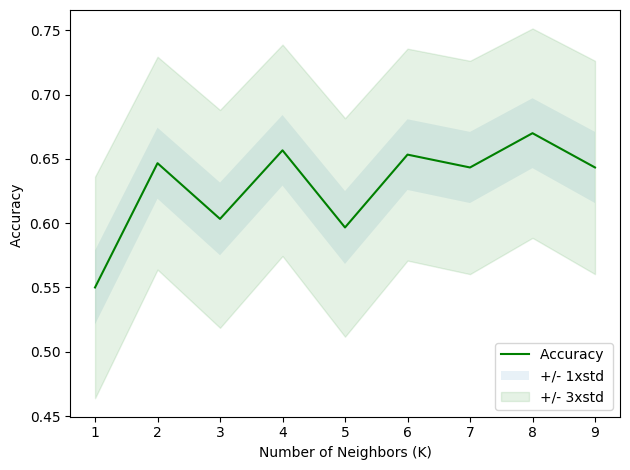

The best accuracy was with 0.67 with k= 8


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    knn1 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn1.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### Parameter Tunning using Grid Search Cv

In [94]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
pow = [1,2]
param_grid = dict(n_neighbors=k_range,
                  weights=weight_options,
                  p = pow)
knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs,
                    param_grid,
                    cv=10,
                    scoring='accuracy')
grid_k.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [95]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)

Tuned Hyperparameters : {'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.7133333333333334


In [96]:
knn1 = KNeighborsClassifier(n_neighbors= 16, p = 1, weights = 'uniform')

In [97]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [98]:
yhat = knn1.predict(X_test)

In [99]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
a1 = jaccard_score(y_test,yhat,pos_label=1)
b1 = f1_score(y_test, yhat, average='weighted')
c1 = accuracy_score(y_test, yhat)
print('The jaccard_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(a1))
print('The F1-score of the KNN for k = 7 classifier on train data is {:.2f}'.format(b1))
print('The Accuracy_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(c1))

The jaccard_score of the KNN for k = 7 classifier on train data is 0.04
The F1-score of the KNN for k = 7 classifier on train data is 0.59
The Accuracy_score of the KNN for k = 7 classifier on train data is 0.69


# Decision Tree

### Parameter Tuning For Decision tree to find best tree

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],

             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

### Find the best parameters

In [101]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Accuracy : 0.7125


In [102]:
Rain_Tree = grid_search.best_estimator_
print(Rain_Tree)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='sqrt',
                       random_state=1)


### Train the best model using Training Data

In [103]:
Rain_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='sqrt',
                       random_state=1)

In [104]:
predTree = Rain_Tree.predict(X_test)

In [105]:
a2 = jaccard_score(y_test, predTree,pos_label=1)
b2 = f1_score(y_test, predTree, average='weighted')
c2 = accuracy_score(y_test, predTree)
print("The accuraccy of (Rain_tree) DecisionTrees's {:.2f} ".format(c2))
print('The jaccard_score of the (Rain_tree) DecisionTrees classifier on train data is {:.2f}'.format(a2))
print('The F1-score of the (Rain_tree) DecisionTrees classifier on train data is {:.2f}'.format(b2))

The accuraccy of (Rain_tree) DecisionTrees's 0.69 
The jaccard_score of the (Rain_tree) DecisionTrees classifier on train data is 0.00
The F1-score of the (Rain_tree) DecisionTrees classifier on train data is 0.56


# Support Vector Machine

### Parameter Tunning For SVM using GridSerachCV

In [106]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','sigmoid']}
grid_s = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_s.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [107]:
print("Tuned Hyperparameters :", grid_s.best_params_)
print("Accuracy :",grid_s.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy : 0.7125


In [108]:
svm = SVC(probability=True,C=0.1, gamma=1, kernel='sigmoid')
print(svm)

SVC(C=0.1, gamma=1, kernel='sigmoid', probability=True)


In [109]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', probability=True)

In [110]:
yhat_s = svm.predict(X_test)

In [111]:
a3 = jaccard_score(y_test, yhat_s,pos_label=1)
b3 = f1_score(y_test, yhat_s, average='weighted')
c3 = accuracy_score(y_test, yhat_s)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))
print('The jaccard_score of the SVM classifier on train data is {:.2f}'.format(a3))
print('The F1-score of the SVM classifier on train data is {:.2f}'.format(b3))
print('The accuracy-score of the SVM classifier on train data is {:.2f}'.format(c3))

The accuracy of the svm classifier on training data is 0.57 out of 1
The accuracy of the svm classifier on test data is 0.61 out of 1
The jaccard_score of the SVM classifier on train data is 0.09
The F1-score of the SVM classifier on train data is 0.57
The accuracy-score of the SVM classifier on train data is 0.61


# Logistic Regression

### Parameter Tunning using Grid Serch CV

In [112]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppD

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [113]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': np.float64(0.001), 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7125


In [114]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,y_train)

LogisticRegression(C=np.float64(0.001), penalty='l1', solver='liblinear')

In [115]:
yhat_l = log_reg.predict(X_test)

In [116]:
a4 = jaccard_score(y_test, yhat_l,pos_label=1)
b4 = f1_score(y_test, yhat_l, average='weighted')
c4 = accuracy_score(y_test, yhat_l)

print('The jaccard_score of the logistic regression classifier on train data is {:.2f}'.format(a4))
print('The F1-score of the logistic regression classifier on train data is {:.2f}'.format(b4))
print('The accuracy_score of the logistic regression classifier on train data is {:.2f}'.format(c4))


The jaccard_score of the logistic regression classifier on train data is 0.00
The F1-score of the logistic regression classifier on train data is 0.56
The accuracy_score of the logistic regression classifier on train data is 0.69


# Model Evaluation

In [117]:
result_df=pd.DataFrame({'Model':['KNN','Decision Tree','SVM','Logistic Regression'],
                    'Jaccard Score' : [a1,a2,a3,a4],
                    'F1 Score' : [b1,b2,b3,b4],
                    'Accuracy Score':[c1,c2,c3,c4]})

In [118]:
print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN       0.041237  0.585957            0.69
1        Decision Tree       0.000000  0.563432            0.69
2                  SVM       0.093023  0.566884            0.61
3  Logistic Regression       0.000000  0.563432            0.69


# using K-fold cross validation

KNN: 0.712500 (0.041037)
DT: 0.712500 (0.041037)
SVM: 0.712500 (0.041037)
LR: 0.712500 (0.041037)


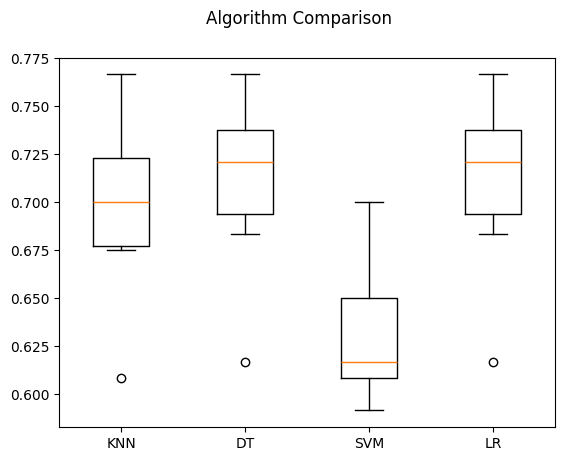

In [119]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT', Rain_Tree ))
models.append(('SVM', svm))
models.append(('LR', log_reg))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
  kfold = model_selection.KFold(n_splits=10,
                                random_state=seed,
                                shuffle=True)
  cv_results = model_selection.cross_val_score(model,
                                               X_train,
                                               y_train,
                                               cv=kfold,
                                               scoring=scoring)
  results.append(cv_results)
  names.append(name)
for name,model in models:
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Ploting ROC_AUC Curce

In [120]:
#d = {'No':0,'Yes' : 1}
#y_test = y_test.map(d)

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [knn1,
               Rain_Tree,
               svm,
               log_reg]
model = ['KNN',
         'Decision Tree',
         'SVM',
         'Logistic Regression','Naive Bayes']
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['model', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    new_row = pd.DataFrame({
        'model': [cls.__class__.__name__],
        'fpr': [fpr],
        'tpr': [tpr],
        'auc': [auc]
    })

    result_table = pd.concat([result_table, new_row], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('model', inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_76704\3286901965.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([result_table, new_row], ignore_index=True)


In [122]:
print(result_table)

                                                                      fpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.0, 0.01932367149758454, 0.038647342995...   
DecisionTreeClassifier                                         [0.0, 1.0]   
SVC                     [0.0, 0.0, 0.014492753623188406, 0.01449275362...   
LogisticRegression                                             [0.0, 1.0]   

                                                                      tpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.010752688172043012, 0.0430107526881720...   
DecisionTreeClassifier                                         [0.0, 1.0]   
SVC                     [0.0, 0.010752688172043012, 0.0107526881720430...   
LogisticRegression                                             [0.0, 1.0]   

                             auc  
model                             
KNei

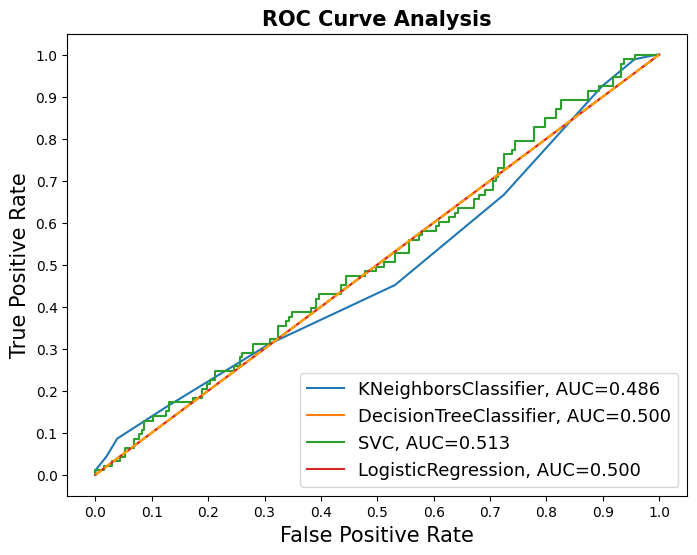

In [123]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()